In [1]:
# utilizando la libreria os para manejos de directorios
import os

# Computacion vectorial y cientifica para python
import numpy as np

#importamos pandas para el manejo del dataset, y separarlos dentro de una matriz
import pandas as pd

#esta tabulate nos sirve para hacer tablas
from tabulate import tabulate

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # -> Necesario para graficar superficies 3D

#Para separa el 20% y 80%
from sklearn.model_selection import train_test_split

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# Leer el archivo csv desde el Google Drive
data = pd.read_csv('/content/gdrive/MyDrive/SIS 420 INTELIGENCIA ARTIFICAL/datasets/SolarPrediction.csv')

In [4]:
data

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
32681,1480587604,12/1/2016 12:00:00 AM,00:20:04,1.22,44,30.43,102,145.42,6.75,06:41:00,17:42:00
32682,1480587301,12/1/2016 12:00:00 AM,00:15:01,1.17,44,30.42,102,117.78,6.75,06:41:00,17:42:00
32683,1480587001,12/1/2016 12:00:00 AM,00:10:01,1.20,44,30.42,102,145.19,9.00,06:41:00,17:42:00
32684,1480586702,12/1/2016 12:00:00 AM,00:05:02,1.23,44,30.42,101,164.19,7.87,06:41:00,17:42:00


In [5]:
# Limpiando el dataset
dataset=data.drop(['Data', 'Time','TimeSunRise','TimeSunSet'], axis=1).astype(float)

In [6]:
dataset

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,1.475229e+09,1.21,48.0,30.46,59.0,177.39,5.62
1,1.475229e+09,1.21,48.0,30.46,58.0,176.78,3.37
2,1.475229e+09,1.23,48.0,30.46,57.0,158.75,3.37
3,1.475228e+09,1.21,48.0,30.46,60.0,137.71,3.37
4,1.475228e+09,1.17,48.0,30.46,62.0,104.95,5.62
...,...,...,...,...,...,...,...
32681,1.480588e+09,1.22,44.0,30.43,102.0,145.42,6.75
32682,1.480587e+09,1.17,44.0,30.42,102.0,117.78,6.75
32683,1.480587e+09,1.20,44.0,30.42,102.0,145.19,9.00
32684,1.480587e+09,1.23,44.0,30.42,101.0,164.19,7.87


Analisis del Dataset mostrando Informacion

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  float64
 1   Radiation               32686 non-null  float64
 2   Temperature             32686 non-null  float64
 3   Pressure                32686 non-null  float64
 4   Humidity                32686 non-null  float64
 5   WindDirection(Degrees)  32686 non-null  float64
 6   Speed                   32686 non-null  float64
dtypes: float64(7)
memory usage: 1.7 MB


In [8]:
#separamos el 20% para test y el 80% para entrenamiento deld dataset
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)

# Seleccionamos las columnas para X y la columna 'price' para y
X_test = test_dataset.drop(['Radiation'], axis=1).values
y_test = test_dataset['Radiation'].values
m_test = len(y_test)

# Seleccionamos las columnas para X y la columna 'price' para y
X_train = train_dataset.drop(['Radiation'], axis=1).values
y_train = train_dataset['Radiation'].values
m_train = len(y_test)
# Ahora, X y y deberían contener datos numéricos del 80% del dataset

# imprimir todos las X de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'Y'
))
print('-' * 180)

for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}{:10.0f}{:8.0f}{:8.0f}{:8.0f}'.format(
        X_train[i, 0],
        X_train[i, 1],
        X_train[i, 2],
        X_train[i, 3],
        X_train[i, 4],
        X_train[i, 5],
        y_train[i]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5]       Y
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
1473879005      57        30        68      27       4     680
1476293121      50        30        96     145      10     277
1477993220      47        30        56     120       3       1
1473013505      57        30        93      39       2     545
1481885434      41        30       103     178       2       1
1483015543      37        30        54     177       7       1
1476124823      60        30        47       5       1     579
1479113702      45        30        83     114       7       1
1482176417      53        31        84     154       8     270
1475442321      57        30        99      41       1     942


In [9]:
#mostramos la cantidad de ejemplos
print(" ")
print('El 80% de ejemplos para entrenamiento son la cantidad de: {:.0f} de ejemplos'.format( len(train_dataset)))
print('El 20% de ejemplos para pruebas son la cantidad de: {:.0f} de ejemplos'.format( len(test_dataset)))
print('La cantidad total de ejemplos es de: {:.0f} de ejemplos'.format( len(dataset)))

 
El 80% de ejemplos para entrenamiento son la cantidad de: 26148 de ejemplos
El 20% de ejemplos para pruebas son la cantidad de: 6538 de ejemplos
La cantidad total de ejemplos es de: 32686 de ejemplos


Funcion para Normalización de características

In [10]:
def  featureNormalize(X):
    X_norm = X.copy()

    #creamos un array de ceros con una longitud igual al número de columnas en el array X. La variable mu y sigma se inicializa como este array de ceros.
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    #Creamos el promedio de cada filaa de X
    #media de cada columna
    mu = np.mean(X, axis = 0)

    #desviacion estandar de cada fila de X
    sigma = np.std(X, axis = 0)

    sigma[sigma == 0] = 1

    #normalizamos los datos con la siguiente formula
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

Funcion para graficar

In [11]:
# Creamos una funcion que nos ayude con las graficas de cada dato respecto a la Y predicha
def graficarDatos(x, y, xlabel, ylabel):
    fig = pyplot.figure()
    pyplot.plot(x, y, 'ro', ms=10, mec='k')

    pyplot.xlabel(xlabel)
    pyplot.ylabel(ylabel)

Funcion del error cuadratico medio

In [12]:
#Creamos la funcion:
def mean_squared_error(y_pred, y_actual):
    resta = y_pred - y_actual
    err_cuadrado = np.sum(resta ** 2)
    return err_cuadrado / len(y_pred)

Funcion del calculo del costo con regularizacion

In [13]:
#aumentamos el parametro de lambda para aplicar regularizacion
#Creamos la funcion de calcular costo
def calcularCostoCR(X, y, theta, lambda_):
    m = y.size
    J = 0

    #creamos una varable temporal para theta, donde decimos que el primer valor de temp es 0, esto para respetar la formula donde j = 1
    temp = theta.copy()
    temp[0] = 0  # Excluimos theta_0 de la regularización
    h = np.dot(X, theta)
    J = (1 / (2 * m)) * np.sum(np.square(h - y)) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
    return J

Funcion descenso por el gradiente con regularizacion

In [14]:
#Creamos la funcion para calcular el descenso por Gradiente
#tambien introducimos el parametro lambda_ para aplicar regularizacion
def calcularDescensoGradienteCR(X, y, theta, alpha,lambda_, numero_iteraciones):
    m = y.shape[0]
    theta = theta.copy()
    J_historico = []

    for i in range(numero_iteraciones):

        theta[0] = theta[0] - ((alpha/m) *( np.dot(X, theta) - y).dot(X[:, 0]))
        theta[1:] = theta[1: ] - ((alpha/m) *( np.dot(X, theta) - y).dot(X[:, 1:])) - (alpha * lambda_ / m) * theta[1:]

        # theta = theta*(1-((alpha*lambda_)/m)) - (alpha / m) * (np.dot(X, theta) - y).dot(X)

        # se hace uso de la funcion de costo para calcular el costo en cada iteracion, sin olvidar del parametro lambda_
        J_historico.append(calcularCostoCR(X, y, theta, lambda_))

    return theta, J_historico

Funcion del costo sin regularizacion

In [15]:
def calcularCostoSR(X, y, theta):
    m = y.size
    J = 0
    #h = np.dot(X, theta)
    # print(h)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

Funcion Descenso por el gradiente sin regularizacion

In [16]:
#Creamos la funcion para calcular el descenso por Gradiente
def calcularDescensoGradienteSR(X, y, theta, alpha, numero_iteraciones):
    m = y.shape[0]
    theta = theta.copy()
    J_historico = []

    for i in range(numero_iteraciones):

        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # se hace uso de la funcion de costo para calcular el costo en cada iteracion
        J_historico.append(calcularCostoSR(X, y, theta))

    return theta, J_historico

Funcion del calculo de la ecuacion de la normal con regularizacion

In [17]:
def calcularThethaEcuacionNormalCR(X, y, lambda_):
    m,n = X.shape

    # Creamos la matriz L
    L = np.eye(n)  # Matriz identidad de tamaño (n+1) x (n+1)
    L[0, 0] = 0  # Establecemos el primer elemento de la matriz L en 0

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X),X) + (lambda_*L)), np.transpose(X)),y)

    return theta

Funcion del calculo de la ecuacion de la normal sin regularizacion

In [18]:
def calcularThethaEcuacionNormalSR(X, y):
    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X),X)),np.transpose(X)),y)

    return theta

# ***Usando 'Regularizacion'***

**Regresión Lineal Multivariable**

Cargando los datos

In [19]:
#hacemos una copia de y_train y y_test para usarlo en la regresion lineal multivariable

#estos datos seran usados para el entrenamiento
X_testRLM = X_test.copy()
y_testRLM = y_test.copy()
m_test_RLM = len(y_testRLM)

#estos datos seran usados para el test
X_trainRLM = X_train.copy()
y_trainRLM = y_train.copy()
m_train_RLM = len(y_trainRLM)

Normalizacion de Caracteristicas

In [20]:
#introductimos los datos a la funcion de normalizacion
X_norm_RLM, mu_RLM, sigma_RLM = featureNormalize(X_trainRLM)

# imprimimos algunos valores de X_norm
print('{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]'
))
print('-' * 180)

for i in range(10):
    print('{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}'.format(
        X_norm_RLM[i, 0],
        X_norm_RLM[i, 1],
        X_norm_RLM[i, 2],
        X_norm_RLM[i, 3],
        X_norm_RLM[i, 4],
        X_norm_RLM[i, 5], ))


    X[:,0]   X[:, 1]   X[:, 2]   X[:, 3]   X[:, 4]   X[:, 5]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    -1.386     0.949     0.496    -0.270    -1.405    -0.502
    -0.583    -0.178     0.862     0.808     0.020     1.111
    -0.018    -0.661     1.045    -0.731    -0.286    -0.826
    -1.674     0.949     0.862     0.692    -1.261    -1.148
     1.277    -1.626    -3.524     1.077     0.413    -1.148
     1.653    -2.270    -1.331    -0.808     0.407     0.144
    -0.639     1.432     0.314    -1.077    -1.667    -1.472
     0.355    -0.982     0.862     0.308    -0.348     0.144
     1.374     0.305     1.958     0.346     0.131     0.465
    -0.866     0.949     0.862     0.923    -1.237    -1.472


Agregando de la culumna de '1' a la matriz

In [21]:
X_ready_RLM = np.concatenate([np.ones((m_train_RLM, 1)), X_norm_RLM], axis=1)

# imprimimos algunos valores de X_norm
print('{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]'
))
print('-' * 180)

for i in range(10):
    print('{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}'.format(
        X_ready_RLM[i, 0],
        X_ready_RLM[i, 1],
        X_ready_RLM[i, 2],
        X_ready_RLM[i, 3],
        X_ready_RLM[i, 4],
        X_ready_RLM[i, 5],
        X_ready_RLM[i, 6]))

    X[:,0]   X[:, 1]   X[:, 2]   X[:, 3]   X[:, 4]   X[:, 5]   X[:, 6]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
     1.000    -1.386     0.949     0.496    -0.270    -1.405    -0.502
     1.000    -0.583    -0.178     0.862     0.808     0.020     1.111
     1.000    -0.018    -0.661     1.045    -0.731    -0.286    -0.826
     1.000    -1.674     0.949     0.862     0.692    -1.261    -1.148
     1.000     1.277    -1.626    -3.524     1.077     0.413    -1.148
     1.000     1.653    -2.270    -1.331    -0.808     0.407     0.144
     1.000    -0.639     1.432     0.314    -1.077    -1.667    -1.472
     1.000     0.355    -0.982     0.862     0.308    -0.348     0.144
     1.000     1.374     0.305     1.958     0.346     0.131     0.465
     1.000    -0.866     0.949     0.862     0.923    -1.237    -1.472


Calculo del Costo

In [22]:
theta_RLM=np.array([0.2, 3.0, 0.2, 0.1, 3.0, 0.2, 1.1])
theta_RLM1=np.array([0.1, 2.0, 0.5, 0.2, 8.0, 0.7, 1.3])

lambda_ = 1000
print(theta_RLM.shape[0])
print(f"----------")
print(f"con theta:{ theta_RLM } se obtiene un costo de: {calcularCostoCR(X_ready_RLM, y_trainRLM, theta_RLM, lambda_)}")
print(f"----------")
print(f"con theta:{ theta_RLM1 } se obtiene un costo de: {calcularCostoCR(X_ready_RLM, y_trainRLM, theta_RLM1, lambda_)}")

7
----------
con theta:[0.2 3.  0.2 0.1 3.  0.2 1.1] se obtiene un costo de: 71792.24325714704
----------
con theta:[0.1 2.  0.5 0.2 8.  0.7 1.3] se obtiene un costo de: 72125.98643081439


Descenso por el gradiente

In [23]:
#creamos un theta de ceros con el tamaño de las columnas de nuestra X
theta = np.zeros(len(X_ready_RLM[0]))

#numero de iteraciones sera 6000, un alpha 0.00009 y un lambda de 1000
num_ite_RLM = 6000
alpha_RLM = 0.0009
lambda_RLM = 1000

theta_RLM, J_historico_RLM = calcularDescensoGradienteCR(X_ready_RLM, y_trainRLM, theta , alpha_RLM,lambda_RLM, num_ite_RLM)
print("----------")
print("Los valores de theta calculados son:")
i = 0
for tht_RLM in theta_RLM:
    i += 1
    print(f"theta {i}: {tht_RLM}")

print(f"----------")
#mostramos el ultimo costo, este seria el mejor costo
print(f"con un costo de: { J_historico_RLM[-1]} ")

print("la cantidad de theta son: ", theta_RLM.shape[0])

----------
Los valores de theta calculados son:
theta 1: 207.10741133795057
theta 2: 49.53626633981177
theta 3: 237.49976019502367
theta 4: -25.19265803324199
theta 5: -5.024124553123441
theta 6: -26.186512551452772
theta 7: 19.904728228811244
----------
con un costo de: 21481.615441227506 
la cantidad de theta son:  7


Grafica de la convergencia del costo

Text(0, 0.5, 'Costo J')

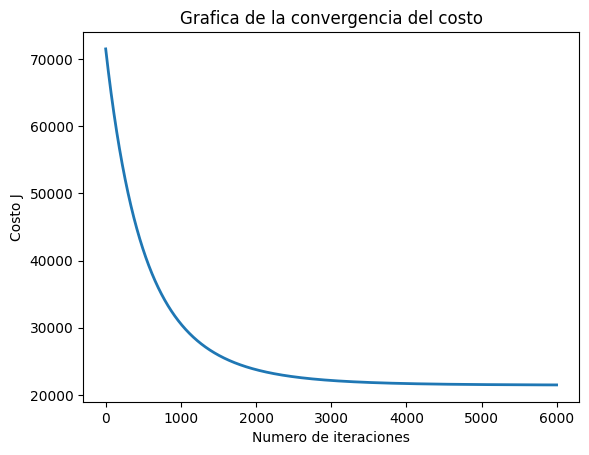

In [24]:
pyplot.plot(np.arange(len(J_historico_RLM)), J_historico_RLM, lw=2)
pyplot.title("Grafica de la convergencia del costo")
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

Grafica de la regresión lineal

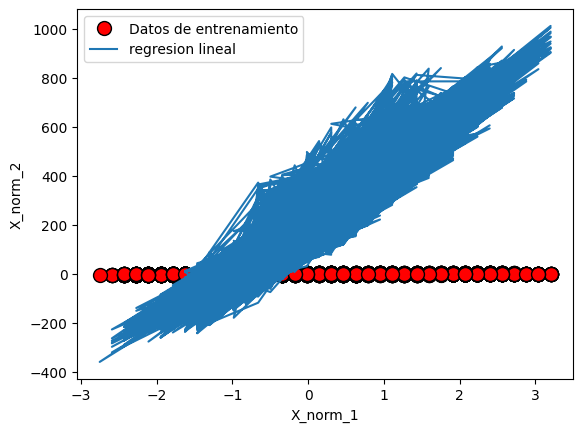

In [25]:
graficarDatos(X_norm_RLM[:, 1],  X_norm_RLM[:, 2] , "X_norm_1", "X_norm_2")

pyplot.plot(X_norm_RLM[:,1], np.dot(X_ready_RLM, theta_RLM), '-')

pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

Prueba

In [26]:
X_arrayRLM = np.array([1475229326,	1.21,	48.0,	30.46,	59.0,	177.39,	5.62])
X_arrayRLM = X_arrayRLM.reshape(1, -1)

X_arrayRLM[:, 1:] = (X_arrayRLM[:, 1:] - mu_RLM) / sigma_RLM

prediccion_RLM = np.dot(X_arrayRLM, theta_RLM)

print (f"La radiacion es de : {prediccion_RLM}")

La radiacion es de : [3.05530902e+11]


Ejemplos de Predicciones

In [27]:
#Creamos la matriz con 11 ejemplos para hacer la prueba predecir un precio de cada ejemplo:
matriz_datos_RLM = np.array([
    [1475214923,1.22,50,30.46,47,157.78,6.75],
    [1475214622,1.24,50,30.46,46,151.6,3.37],
    [1475214325,1.25,50,30.46,47,105.78,4.5],
    [1475214022,1.19,50,30.46,48,135.55,4.5],
    [1475213722,1.19,50,30.46,56,140.92,4.5],
    [1475213121,1.19,51,30.46,55,126.63,3.37],
    [1475212820,1.23,51,30.46,54,119.97,4.5],
    [1475212522,1.22,51,30.45,53,95.57,2.25],
    [1475212224,1.24,51,30.45,51,100.02,4.5],
    [1475211920,1.24,51,30.45,51,111.73,2.25],
    [1475211319,1.23,51,30.45,51,105.89,6.75]
])

#creamos un vector parta almacenar cada Y predicha
y_pre_RLM = []
matriz_datos_RLM_copy = matriz_datos_RLM.copy()

#Normalizamos todos, menos el primer valor de cada ejemplo

matriz_datos_RLM_copy[:, 1:] = (matriz_datos_RLM_copy[:, 1:] - mu_RLM) / sigma_RLM


#Calculamos la Y predicha de los 11 ejemplos de prediccion
for datos in matriz_datos_RLM_copy:
    y_pre_RLM.append(np.dot(datos, theta_RLM))

matriz_datos_RLM = np.column_stack((matriz_datos_RLM, y_pre_RLM))

nombres_columnas = ['UNIXTime', 'Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed', 'Radiation']

# Convertir la matriz en una lista de listas
datos_para_tabla = matriz_datos_RLM.tolist()

print(len(matriz_datos_RLM[0]))
print(len(matriz_datos_RLM_copy[0]))

# Imprimir la tabla
print(tabulate(datos_para_tabla, headers=nombres_columnas, tablefmt='grid'))

8
7
+-------------+------------+---------------+------------+------------+--------------------------+---------+-------------+
|             |   UNIXTime |   Temperature |   Pressure |   Humidity |   WindDirection(Degrees) |   Speed |   Radiation |
+=============+============+===============+============+============+==========================+=========+=============+
| 1.47521e+09 |       1.22 |            50 |      30.46 |         47 |                   157.78 |    6.75 | 3.05528e+11 |
+-------------+------------+---------------+------------+------------+--------------------------+---------+-------------+
| 1.47521e+09 |       1.24 |            50 |      30.46 |         46 |                   151.6  |    3.37 | 3.05528e+11 |
+-------------+------------+---------------+------------+------------+--------------------------+---------+-------------+
| 1.47521e+09 |       1.25 |            50 |      30.46 |         47 |                   105.78 |    4.5  | 3.05528e+11 |
+-------------+-----

Validaciones

In [28]:
#Concatenamos de unos a la primera posicion del X_test
X_testRLM_ready = np.concatenate([np.ones((m_test_RLM, 1)), X_testRLM], axis=1)

# Normalizamos todos, menos el primer valor de cada ejemplo porque este contiene los unos
X_testRLM_ready[:, 1:] = (X_testRLM_ready[:, 1:] - mu_RLM) / sigma_RLM

#creamos un array que almacenara cada una de las y_predicha
y_predicha_RLM = []
for data_RLM in X_testRLM_ready:
    y_predicha_RLM.append(np.dot(data_RLM, theta_RLM))

mse_RLM = mean_squared_error(y_predicha_RLM, y_testRLM)
#calculamos el error cuadratico medio:
print('Error Cuadrático Medio (MSE) = ' + str(mse_RLM))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(np.sqrt(mse_RLM)))

Error Cuadrático Medio (MSE) = 41470.122222172104
Raíz del Error Cuadrático Medio (RMSE) = 203.64214254955212


# ***Usando sin 'Regularizacion'***

**Regresión Lineal Multivariable**

In [29]:
#hacemos una copia de y_train y y_test para usarlo en la regresion lineal multivariable

#estos datos seran usados para el entrenamiento
X_testRLM = X_test.copy()
y_testRLM = y_test.copy()
m_test_RLM = len(y_testRLM)

#estos datos seran usados para el test
X_trainRLM = X_train.copy()
y_trainRLM = y_train.copy()
m_train_RLM = len(y_trainRLM)

Normalizacion de caracteristicas

In [30]:
#introductimos los datos a la funcion de normalizacion
X_norm_RLM, mu_RLM, sigma_RLM = featureNormalize(X_trainRLM)

# imprimimos algunos valores de X_norm
print('{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]'
))
print('-' * 180)

for i in range(10):
    print('{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}'.format(
        X_norm_RLM[i, 0],
        X_norm_RLM[i, 1],
        X_norm_RLM[i, 2],
        X_norm_RLM[i, 3],
        X_norm_RLM[i, 4],
        X_norm_RLM[i, 5],
        ))

    X[:,0]   X[:, 1]   X[:, 2]   X[:, 3]   X[:, 4]   X[:, 5]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
    -1.386     0.949     0.496    -0.270    -1.405    -0.502
    -0.583    -0.178     0.862     0.808     0.020     1.111
    -0.018    -0.661     1.045    -0.731    -0.286    -0.826
    -1.674     0.949     0.862     0.692    -1.261    -1.148
     1.277    -1.626    -3.524     1.077     0.413    -1.148
     1.653    -2.270    -1.331    -0.808     0.407     0.144
    -0.639     1.432     0.314    -1.077    -1.667    -1.472
     0.355    -0.982     0.862     0.308    -0.348     0.144
     1.374     0.305     1.958     0.346     0.131     0.465
    -0.866     0.949     0.862     0.923    -1.237    -1.472


Agregando la columna de 1 ala matriz

In [31]:
X_ready_RLM = np.concatenate([np.ones((m_train_RLM, 1)), X_norm_RLM], axis=1)

# imprimimos algunos valores de X_norm
print('{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]'
))
print('-' * 180)

for i in range(10):
    print('{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}'.format(
        X_ready_RLM[i, 0],
        X_ready_RLM[i, 1],
        X_ready_RLM[i, 2],
        X_ready_RLM[i, 3],
        X_ready_RLM[i, 4],
        X_ready_RLM[i, 5],
        X_ready_RLM[i, 6]))

    X[:,0]   X[:, 1]   X[:, 2]   X[:, 3]   X[:, 4]   X[:, 5]   X[:, 6]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
     1.000    -1.386     0.949     0.496    -0.270    -1.405    -0.502
     1.000    -0.583    -0.178     0.862     0.808     0.020     1.111
     1.000    -0.018    -0.661     1.045    -0.731    -0.286    -0.826
     1.000    -1.674     0.949     0.862     0.692    -1.261    -1.148
     1.000     1.277    -1.626    -3.524     1.077     0.413    -1.148
     1.000     1.653    -2.270    -1.331    -0.808     0.407     0.144
     1.000    -0.639     1.432     0.314    -1.077    -1.667    -1.472
     1.000     0.355    -0.982     0.862     0.308    -0.348     0.144
     1.000     1.374     0.305     1.958     0.346     0.131     0.465
     1.000    -0.866     0.949     0.862     0.923    -1.237    -1.472


Cálculo del Costo

In [32]:
theta_RLM=np.array([0.2, 3.0, 0.2, 0.1, 3.0, 0.2, 1.1])
theta_RLM1=np.array([0.1, 2.0, 0.5, 0.2, 8.0, 0.7, 1.3])
print(theta.shape[0])
print(f"----------")
print(f"con theta:{ theta_RLM } se obtiene un costo de: {calcularCostoSR(X_ready_RLM, y_trainRLM, theta_RLM)}")
print(f"----------")
print(f"con theta:{ theta_RLM1 } se obtiene un costo de: {calcularCostoSR(X_ready_RLM, y_trainRLM, theta_RLM1)}")

7
----------
con theta:[0.2 3.  0.2 0.1 3.  0.2 1.1] se obtiene un costo de: 71791.87420406459
----------
con theta:[0.1 2.  0.5 0.2 8.  0.7 1.3] se obtiene un costo de: 72124.6389090154


Descenso por el Gradiente

In [33]:
#creamos un theta con 19 columnas de ceros
theta_RLM = np.zeros(len(X_ready_RLM[0]))

#numero de iteraciones sera 6000 y un alpha 0.00009
num_ite_RLM = 6000
alpha_RLM = 0.0009

theta_RLM, J_historico_RLM = calcularDescensoGradienteSR(X_ready_RLM, y_trainRLM, theta_RLM, alpha_RLM, num_ite_RLM)
print("----------")
print("Los valores de theta calculados son:")
i = 0
for tht in theta_RLM:
    i += 1
    print(f"theta {i}: {tht}")

print(f"----------")
#mostramos el ultimo costo, este seria el mejor costo
print(f"con un costo de: { J_historico_RLM[-1]} ")
print("la cantidad de theta son: ", theta.shape[0])

----------
Los valores de theta calculados son:
theta 1: 207.10741133800298
theta 2: 54.1823327384172
theta 3: 248.8111880508407
theta 4: -27.437165884306285
theta 5: -2.6754456739302817
theta 6: -25.6946947979254
theta 7: 20.493676404574853
----------
con un costo de: 20189.73067751055 
la cantidad de theta son:  7


Gráfica de la Convergencia de Datos

Text(0, 0.5, 'Costo J')

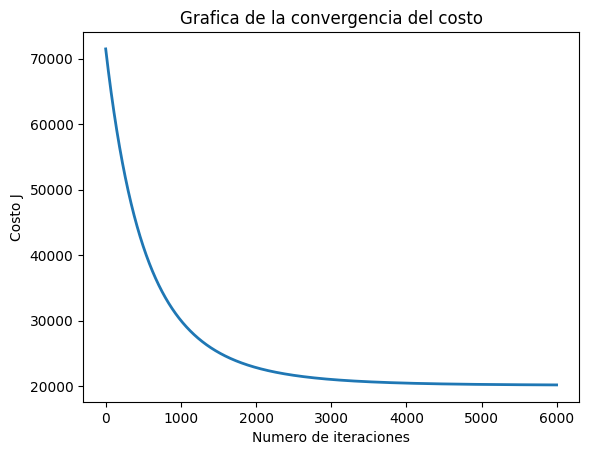

In [34]:
pyplot.plot(np.arange(len(J_historico_RLM)), J_historico_RLM, lw=2)
pyplot.title("Grafica de la convergencia del costo")
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

Grafica de la Regresión Lienal

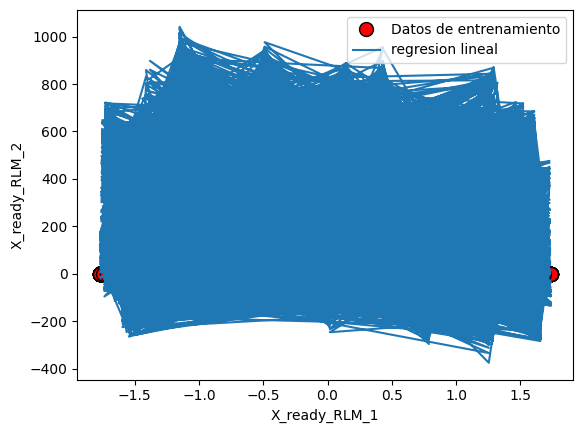

In [35]:
graficarDatos(X_ready_RLM[:, 1],  X_ready_RLM[:, 2] , "X_ready_RLM_1", "X_ready_RLM_2")

pyplot.plot(X_ready_RLM[:,1], np.dot(X_ready_RLM, theta_RLM), '-')

pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

Prueba

In [36]:
X_arrayRLM = np.array([1475229326,	1.21,	48.0,	30.46,	59.0,	177.39,	5.62])
X_arrayRLM = X_arrayRLM.reshape(1, -1)

X_arrayRLM[:, 1:] = (X_arrayRLM[:, 1:] - mu_RLM) / sigma_RLM

prediccion_RLM = np.dot(X_arrayRLM, theta_RLM)

print (f"La prediccion de la casa es de: {prediccion_RLM}")

La prediccion de la casa es de: [3.055309e+11]


Ejemplos

In [37]:
#Creamos la matriz con 11 ejemplos para hacer la prueba predecir un precio de cada ejemplo:
matriz_datos_RLM = np.array([
    [1475214923,1.22,50,30.46,47,157.78,6.75],
    [1475214622,1.24,50,30.46,46,151.6,3.37],
    [1475214325,1.25,50,30.46,47,105.78,4.5],
    [1475214022,1.19,50,30.46,48,135.55,4.5],
    [1475213722,1.19,50,30.46,56,140.92,4.5],
    [1475213121,1.19,51,30.46,55,126.63,3.37],
    [1475212820,1.23,51,30.46,54,119.97,4.5],
    [1475212522,1.22,51,30.45,53,95.57,2.25],
    [1475212224,1.24,51,30.45,51,100.02,4.5],
    [1475211920,1.24,51,30.45,51,111.73,2.25],
    [1475211319,1.23,51,30.45,51,105.89,6.75]
])

#creamos un vector parta almacenar cada Y predicha
y_pre_RLM = []
matriz_datos_RLM_copy = matriz_datos_RLM.copy()

#Normalizamos todos, menos el primer valor de cada ejemplo

matriz_datos_RLM_copy[:, 1:] = (matriz_datos_RLM_copy[:, 1:] - mu_RLM) / sigma_RLM


#Calculamos la Y predicha de los 11 ejemplos de prediccion
for datos in matriz_datos_RLM_copy:
    y_pre_RLM.append(np.dot(datos, theta_RLM))

matriz_datos_RLM = np.column_stack((matriz_datos_RLM, y_pre_RLM))

nombres_columnas = ['UNIXTime', 'Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed', 'Radiation']
# Convertir la matriz en una lista de listas
datos_para_tabla = matriz_datos_RLM.tolist()

print(len(matriz_datos_RLM[0]))
print(len(matriz_datos_RLM_copy[0]))

# Imprimir la tabla
print(tabulate(datos_para_tabla, headers=nombres_columnas, tablefmt='grid'))

8
7
+-------------+------------+---------------+------------+------------+--------------------------+---------+-------------+
|             |   UNIXTime |   Temperature |   Pressure |   Humidity |   WindDirection(Degrees) |   Speed |   Radiation |
+=============+============+===============+============+============+==========================+=========+=============+
| 1.47521e+09 |       1.22 |            50 |      30.46 |         47 |                   157.78 |    6.75 | 3.05528e+11 |
+-------------+------------+---------------+------------+------------+--------------------------+---------+-------------+
| 1.47521e+09 |       1.24 |            50 |      30.46 |         46 |                   151.6  |    3.37 | 3.05528e+11 |
+-------------+------------+---------------+------------+------------+--------------------------+---------+-------------+
| 1.47521e+09 |       1.25 |            50 |      30.46 |         47 |                   105.78 |    4.5  | 3.05528e+11 |
+-------------+-----

Validaciones

In [38]:
#Concatenamos de unos a la primera posicion del X_test
X_testRLM_ready = np.concatenate([np.ones((m_test_RLM, 1)), X_testRLM], axis=1)

# Normalizamos todos, menos el primer valor de cada ejemplo porque este contiene los unos
X_testRLM_ready[:, 1:] = (X_testRLM_ready[:, 1:] - mu_RLM) / sigma_RLM

#creamos un array que almacenara cada una de las y_predicha
y_predicha_RLM = []
for data_RLM in X_testRLM_ready:
    y_predicha_RLM.append(np.dot(data_RLM, theta_RLM))

mse_RLM = mean_squared_error(y_predicha_RLM, y_testRLM)
#calculamos el error cuadratico medio:
print('Error Cuadrático Medio (MSE) = ' + str(mse_RLM))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(np.sqrt(mse_RLM)))

Error Cuadrático Medio (MSE) = 41211.11104603957
Raíz del Error Cuadrático Medio (RMSE) = 203.00519955419756


# **Informe**

1. Respecto a la precision
   El error cuadratico medio con regularizacion

*   El error cuadratico medio con regularizacion 41470.122222172104
*   El error cuadratico medio sin regularizacion 41211.11104603957

Se puede notar que el modelo con regularizacion puede ser mejor



2. Respecto al Calculo del Costo


*   Costo Calculado del modelo con regularizacion 21481.615441227506
*   Costo Calculado del modelo sin regularizacion 20189.73067751055

El modelo sin regularizacion es menor al modelo aplicado con regularizacion, debido a que con regularizacion se incrementa el parametro de lamda y esto hace elevar el costo


El mejor modelo es aquel que se aplica con "Regularizacion", porque el costo puede ser elevado y seria mucho mejor si se aplica en circunstancias donde el numero de iteraciones sea demasiado alta.
El modelo sin regularizacion seria mejor aplicado en circunstancias donde se tengan menos parametros.